
# **Capstone Project - Supervised ML - Classification**

# <b><u> Project Title : Predicting Loan Approval or Rejection </u></b>



##**Project Overview**

In this Capstone Project, the goal is to develop a predictive model that can determine whether a loan application will be approved or rejected by a financial institution. This project focuses on the classification problem of assessing credit risk and making informed lending decisions.

##**Understanding Loans in Finance**

 In the realm of finance, a loan 💰 represents the act of disbursing funds, wherein one or more individuals, organizations, or entities extend financial resources to other parties, encompassing both individuals and organizations, among others. The recipient, commonly referred to as the borrower 💁‍♂️🏠, assumes a financial obligation 💳, thereby incurring a debt. Typically, this debt incurs an interest obligation 💸 that persists until the entire borrowed principal amount is fully repaid, alongside the repayment of the principal itself. 📈🔒

**The major aim of this notebook is to predict which of the customers will have their loan approved.**

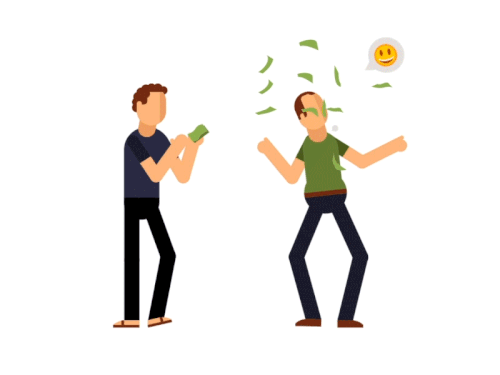

📊 DATA ID 🆔

This dataset is known as the Loan Prediction Dataset 🏦💼. Within this dataset, you'll discover a collection of 613 records 📄, each characterized by 13 distinct attributes 📝📊.

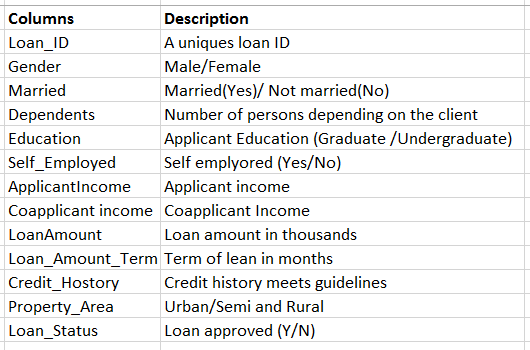

**The primary goal for this dataset is to leverage advanced machine learning techniques 🤖📊 in order to make predictions regarding loan payments 🏦💰.**

target value: Loan_Status

# ***Let's Begin !***
# **IMPORT THE NECESSARY LIBRARIES📕📗📘**

In [92]:
import os
import numpy as np
import pandas as pd
import warnings

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

# Warning handling
warnings.filterwarnings("ignore")

# Additional ML models
adaboost_model = AdaBoostClassifier()
gradient_boosting_model = GradientBoostingClassifier()

# GridSearchCV and RandomizedSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid={}, cv=5, n_jobs=-1)
randomized_search = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions={}, n_iter=10, cv=5, n_jobs=-1)

# You can replace {} inside param_grid and param_distributions with specific hyperparameters to search for.


# **Dataset Loading**

In [2]:
#Load dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **File path 📂**

In [3]:
# loading csv File
file_path = '/content/drive/MyDrive/Almabetter/code clause/1 project/train.csv'
train_data =pd.read_csv(file_path)

In [4]:
# loading csv File
file_path = '/content/drive/MyDrive/Almabetter/code clause/1 project/test.csv'
test_data =pd.read_csv(file_path)

# **Understand the Data:**

In [5]:
# Display the first few rows of the training dataseT
train_data.head()


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [6]:
# Display the first few rows of the testing dataset
test_data.head()


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [7]:
# Count of rows and columns in the training set
train_rows, train_columns = train_data.shape
print(f"Training Set: Rows={train_rows}, Columns={train_columns}")

# Count of rows and columns in the testing set
test_rows, test_columns = test_data.shape
print(f"Testing Set: Rows={test_rows}, Columns={test_columns}")


Training Set: Rows=614, Columns=13
Testing Set: Rows=367, Columns=12


In [8]:
# Display information about the training dataset
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# Get statistical information about the training dataset
train_data.describe()


ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [10]:
# Check the distribution of the target variable "Loan_Status"
loan_status_distribution = train_data['Loan_Status'].value_counts()

print("Loan_Status Distribution:")
print(loan_status_distribution)


Loan_Status Distribution:
Y    422
N    192
Name: Loan_Status, dtype: int64


<Figure size 700x400 with 0 Axes>

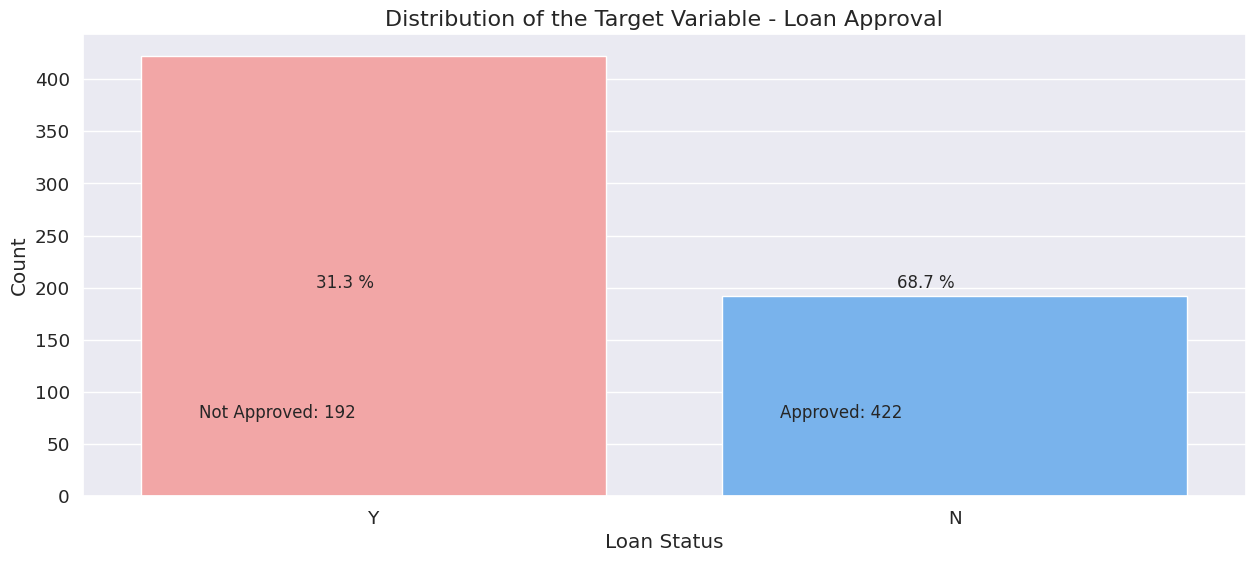

In [11]:
# Define an attractive color palette
attractive_palette = ['#ff9999', '#66b3ff']

# The frequency of loan approvals
approved = train_data['Loan_Status'].value_counts()['Y']
rejected = train_data['Loan_Status'].value_counts()['N']

# Percentage
approved_perc = round(approved / len(train_data) * 100, 1)
rejected_perc = round(rejected / len(train_data) * 100, 1)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.set_context('notebook', font_scale=1.2)
plt.figure(figsize=(15, 6))
sns.countplot(x='Loan_Status', data=train_data, palette=attractive_palette)
plt.annotate('Not Approved: {}'.format(rejected), xy=(-0.3, 300), xytext=(-0.3, 75), size=12)
plt.annotate('Approved: {}'.format(approved), xy=(0.7, 300), xytext=(0.7, 75), size=12)
plt.annotate(str(rejected_perc) + " %", xy=(-0.3, 300), xytext=(-0.1, 200), size=12)
plt.annotate(str(approved_perc) + " %", xy=(0.7, 300), xytext=(0.9, 200), size=12)
plt.title('Distribution of the Target Variable - Loan Approval', fontsize=16)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


# **Data Analysis and Preprocessing 💻**

Handling missing values is a crucial step in data preprocessing for a loan prediction dataset. Depending on the nature of the missing data and the dataset's characteristics, you can use different strategies to handle missing values. Here are some common approaches:

In [12]:
# Assuming our train data DataFrame is named "train_data"
train_data.drop(columns=['Loan_ID'], inplace=True)
# Checking the new shape of the DataFrame
print("Training data shape (row, col):", train_data.shape)
# Assuming our test data DataFrame is named "test_data"
test_data.drop(columns=['Loan_ID'], inplace=True)
# Checking the new shape of the DataFrame
print("Test data shape (row, col):", test_data.shape)

Training data shape (row, col): (614, 12)
Test data shape (row, col): (367, 11)


# **In data 📊 cleaning🧹 we will check for**:

* **Duplicates**
* **Missing Value/Null values/NaN values**

# **Duplicates 🔁**

In [13]:
# Check for duplicate rows in the train data DataFrame
duplicate_rows_train = train_data[train_data.duplicated()]
# Display the number of duplicate rows
print("Number of Duplicate Rows in Train Data:", len(duplicate_rows_train))
# Check for duplicate rows in the test data DataFrame
duplicate_rows_test = test_data[test_data.duplicated()]
# Display the number of duplicate rows
print("Number of Duplicate Rows in Test Data:", len(duplicate_rows_test))


Number of Duplicate Rows in Train Data: 0
Number of Duplicate Rows in Test Data: 1


In [14]:
# Check for duplicate rows in the test data DataFrame
duplicate_rows_test = test_data[test_data.duplicated(keep=False)]

# Add a new column for row numbers
duplicate_rows_test['Row Number'] = duplicate_rows_test.index

# Display both duplicate rows with row numbers in a tabular format
print("Duplicate Rows in Test Data:")
print(duplicate_rows_test.to_string(index=False))


Duplicate Rows in Test Data:
Gender Married Dependents Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area  Row Number
  Male      No          0  Graduate           Yes             5833                  0       116.0             360.0             1.0         Urban          38
  Male      No          0  Graduate           Yes             5833                  0       116.0             360.0             1.0         Urban         195


In [15]:
# Remove duplicate rows from the test data DataFrame
test_data = test_data.drop_duplicates()

# Checking the new shape of the DataFrame after removing duplicates
print("Test data shape (row, col) after removing duplicates:", test_data.shape)


Test data shape (row, col) after removing duplicates: (366, 11)


# **Missing values 🚫 /Null values 🅾️ /NaN values 🤷‍♂️**

In [16]:
# Check for missing data in the train data DataFrame
missing_data_train = train_data.isnull().sum().sort_values(ascending=False)

# Display the count of missing values for each column
print("Missing Data in Train Data:")
print(missing_data_train)

Missing Data in Train Data:
Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64


In [17]:
train_data.fillna(method='ffill',inplace=True)

In [18]:
train_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
#list of all the columns.columns
#Cols = tr_df.tolist()
#list of all the numeric columns
num = train_data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = train_data.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  train_data[num]
#categoric df
loan_cat = train_data[cat]

Let's plot our data

Numeric:

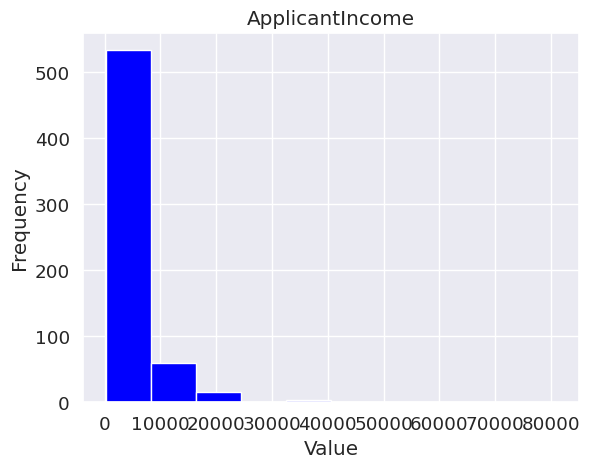

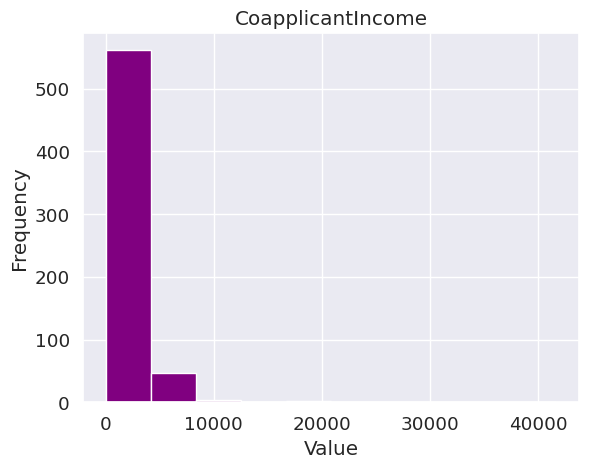

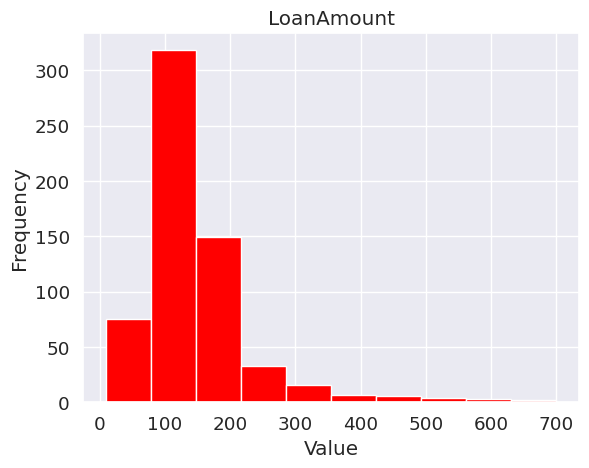

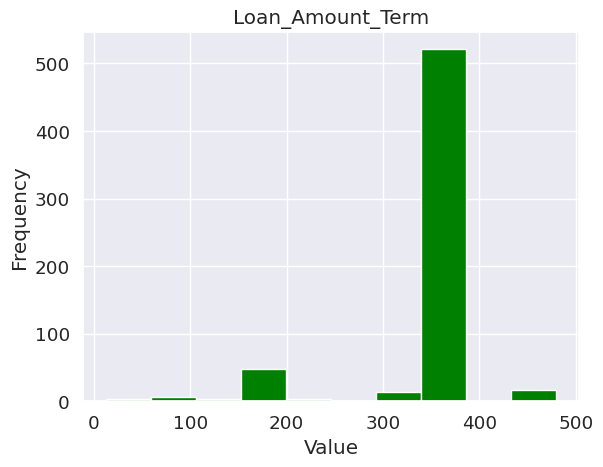

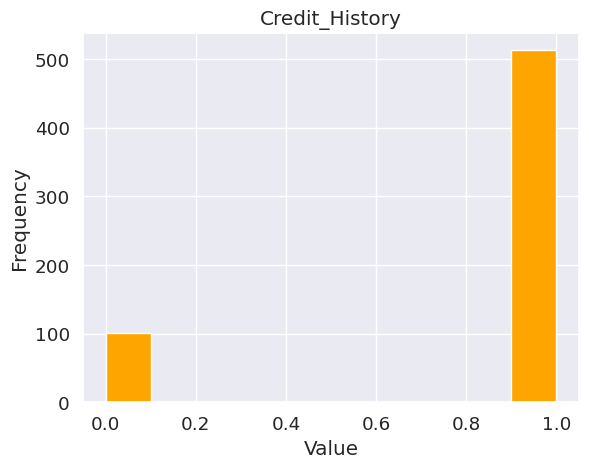

In [20]:
import matplotlib.pyplot as plt

# Assuming 'loan_num' contains your numerical features
loan_num_colors = ['blue', 'purple', 'red', 'green', 'orange']  # Define colors for each feature

for idx, i in enumerate(loan_num):
    plt.hist(loan_num[i], color=loan_num_colors[idx])
    plt.title(i)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


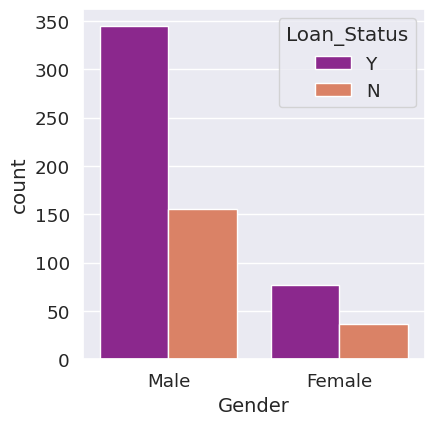

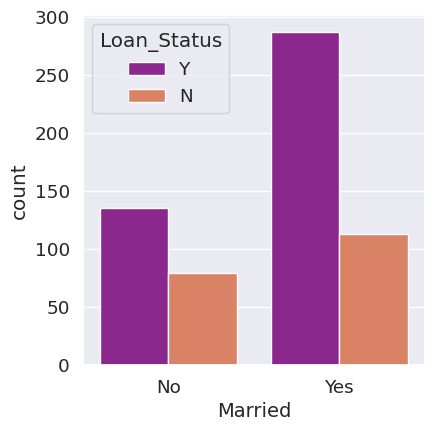

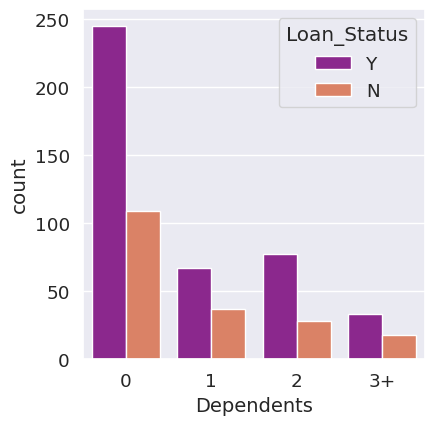

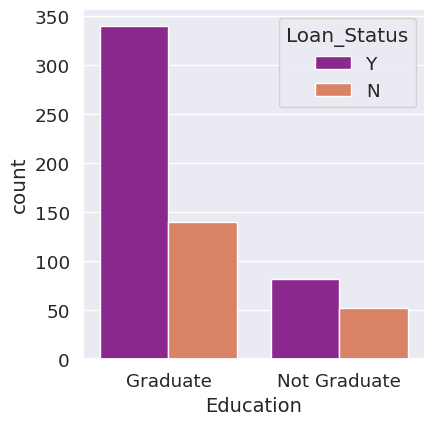

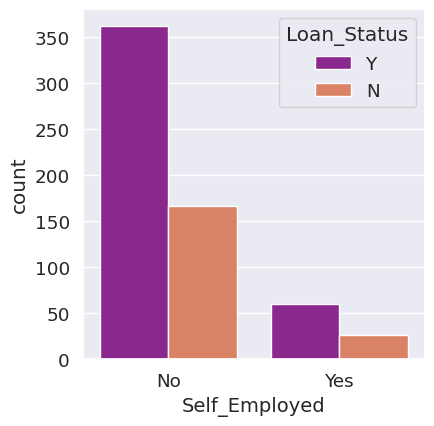

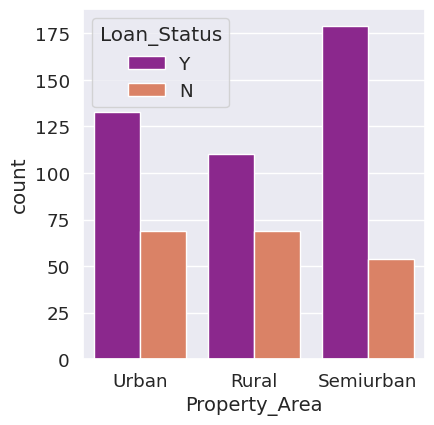

In [21]:
for i in cat[:-1]:
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1)
    # Use an attractive Seaborn color palette ('Set2' in this case)
    sns.countplot(x=i, hue='Loan_Status', data=train_data, palette='plasma')
    plt.xlabel(i, fontsize=14)
    plt.show()  # Show the plot for each category 'i'


**Encoding data to numeric**

In [22]:
import pandas as pd

# Define the mapping for categorical to numeric conversion
to_numeric = {
    'Male': 1, 'Female': 2,
    'Yes': 1, 'No': 2,
    'Graduate': 1, 'Not Graduate': 2,
    'Urban': 3, 'Semiurban': 2, 'Rural': 1,
    'Y': 1, 'N': 0,
    '3+': 3
}

# Apply the mapping to both train_data and test_data
train_data = train_data.applymap(lambda label: to_numeric.get(label) if label in to_numeric else label)
test_data = test_data.applymap(lambda label: to_numeric.get(label) if label in to_numeric else label)

# Convert the 'Dependents' column to numeric
train_data['Dependents'] = pd.to_numeric(train_data['Dependents'], errors='coerce')  # 'coerce' to handle any non-numeric values
test_data['Dependents'] = pd.to_numeric(test_data['Dependents'], errors='coerce')

# Check the shape and info of the manipulated datasets
print(f"Training set (row, col): {train_data.shape}\n")
print(train_data.info(), "\n")

print(f"Testing set (row, col): {test_data.shape}\n")
print(test_data.info(), "\n")


Training set (row, col): (614, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         613 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
None 

Testing set (row, col): (366, 11)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 366
Data columns (total 11

# **Correlation Matrix**

<Axes: >

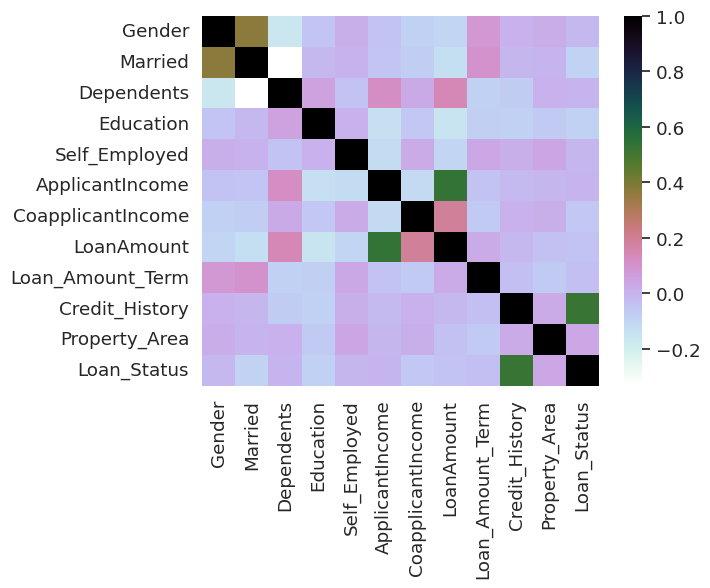

In [23]:
#plotting the correlation matrix
sns.heatmap(train_data.corr() ,cmap='cubehelix_r')

**Correlation table for a more detailed analysis:**

In [24]:
#correlation table
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

We can clearly see that Credit_History has the highest correlation with Loan_Status (a positive correlation of 0.54) 📈. Therefore, our target value is highly dependent on this column 🔍.


# **Machine Learning Models 🤖**

To begin our journey into the world of machine learning, we'll start by dividing our dataset into two essential variables:

X: This variable will contain the features we've defined earlier 🧾. These features are critical for training our models and will help them make predictions.

y: Here, we'll store the Loan_Status, which is the target value we aim to predict 🎯. The performance of our machine learning models will be assessed based on how accurately they can predict this target variable.






**Models we will use:**

Logistic Regression

Decision Tree

Random Forest

Gradient Boosting

XGBoost

Support Vector Machine (SVM)

K-Nearest Neighbors (KNN)

Naive Bayes

In [25]:
# Step 1: Define the target variable (y)
y = train_data['Loan_Status']

# Step 2: Define the feature matrix (X) and handle missing values
X = train_data.drop('Loan_Status', axis=1)

# Step 3: Handle missing values in X using SimpleImputer
from sklearn.impute import SimpleImputer

# Create an imputer that fills NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X and transform X to replace missing values with column means
X = imputer.fit_transform(X)

# Convert the imputed feature matrix back to a DataFrame with original column names
X = pd.DataFrame(X, columns=train_data.drop('Loan_Status', axis=1).columns)

# Step 4: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Now you can use X_train and X_test for training and testing your model.


# **Logistic Regression**

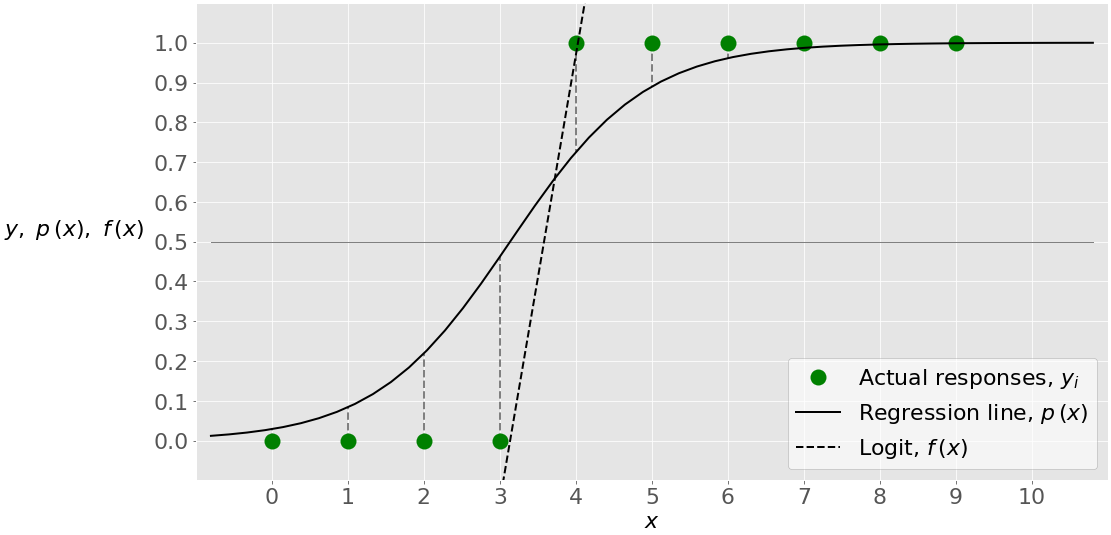

In [26]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer

In [27]:
# Step 2: Create an imputer that fills NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [28]:
# Step 3: fitting data into Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_imputed, y_train)


LogisticRegression()

In [29]:
# Step 4: Make predictions on both training and testing data
y_train_pred_logi = logistic_model.predict(X_train_imputed)
y_pred_logi = logistic_model.predict(X_test_imputed)

#Model Evaluation

In [30]:
# Step 5: Calculate and print the accuracy scores
train_accuracy_logi = accuracy_score(y_train_pred_logi, y_train)
test_accuracy_logi = accuracy_score(y_pred_logi, y_test)

print("The accuracy on the training data is:", train_accuracy_logi)
print("The accuracy on the testing data is:", test_accuracy_logi)

The accuracy on the training data is: 0.8004073319755601
The accuracy on the testing data is: 0.8455284552845529


In [31]:
# Step 6: Calculate and print various performance metrics
train_accuracy_logi = round(accuracy_score(y_train_pred_logi, y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi, y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi, y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi, y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi, y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi, y_test), 3)

print("The accuracy on train data is", train_accuracy_logi)
print("The accuracy on test data is", accuracy_logi)
print("The precision on test data is", precision_score_logi)
print("The recall on test data is", recall_score_logi)
print("The f1 on test data is", f1_score_logi)
print("The roc_score on test data is", roc_score_logi)


The accuracy on train data is 0.8
The accuracy on test data is 0.846
The precision on test data is 0.967
The recall on test data is 0.845
The f1 on test data is 0.902
The roc_score on test data is 0.847


In [32]:
# Step 7: Calculate and print the classification report
classification_rep = classification_report(y_test, y_pred_logi)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.52      0.64        33
           1       0.84      0.97      0.90        90

    accuracy                           0.85       123
   macro avg       0.85      0.74      0.77       123
weighted avg       0.85      0.85      0.83       123



In [33]:
# Step 8: Calculate and print accuracy
accuracy_test = round(accuracy_score(y_test, y_pred_logi), 3)
print("Accuracy on test data:", accuracy_test)


Accuracy on test data: 0.846


# **Decision Tree**

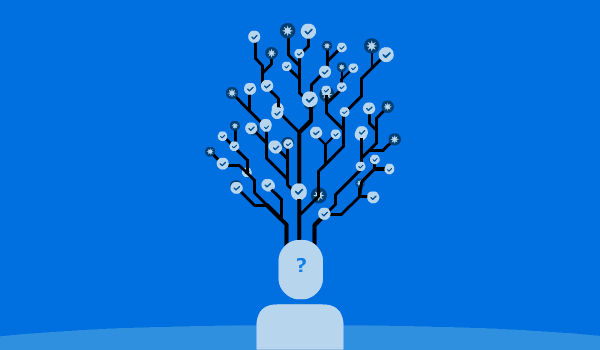

In [34]:
# Step 1: Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer

In [35]:
# Step 2: Create an imputer that fills NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [36]:
# Step 3: Initialize and train a Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_imputed, y_train)

DecisionTreeClassifier()

In [37]:
# Step 4: Make predictions on both training and testing data
y_train_pred_dt = decision_tree_model.predict(X_train_imputed)
y_pred_dt = decision_tree_model.predict(X_test_imputed)

# Model Evaluation

In [38]:
# Step 5: Calculate and print the accuracy scores
train_accuracy_dt = accuracy_score(y_train_pred_dt, y_train)
test_accuracy_dt = accuracy_score(y_pred_dt, y_test)

print("The accuracy on the training data is:", train_accuracy_dt)
print("The accuracy on the testing data is:", test_accuracy_dt)

The accuracy on the training data is: 1.0
The accuracy on the testing data is: 0.6991869918699187


In [39]:
# Step 6: Calculate and print various performance metrics
train_accuracy_dt = round(accuracy_score(y_train_pred_dt, y_train), 3)
accuracy_dt = round(accuracy_score(y_pred_dt, y_test), 3)
precision_score_dt = round(precision_score(y_pred_dt, y_test), 3)
recall_score_dt = round(recall_score(y_pred_dt, y_test), 3)
f1_score_dt = round(f1_score(y_pred_dt, y_test), 3)
roc_score_dt = round(roc_auc_score(y_pred_dt, y_test), 3)

print("The accuracy on train data is", train_accuracy_dt)
print("The accuracy on test data is", accuracy_dt)
print("The precision on test data is", precision_score_dt)
print("The recall on test data is", recall_score_dt)
print("The f1 on test data is", f1_score_dt)
print("The roc_score on test data is", roc_score_dt)

The accuracy on train data is 1.0
The accuracy on test data is 0.699
The precision on test data is 0.767
The recall on test data is 0.812
The f1 on test data is 0.789
The roc_score on test data is 0.63


In [40]:
# Step 7: Calculate and print the classification report
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", classification_rep_dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.52      0.48        33
           1       0.81      0.77      0.79        90

    accuracy                           0.70       123
   macro avg       0.63      0.64      0.63       123
weighted avg       0.71      0.70      0.71       123



In [41]:
# Step 8: Calculate and print accuracy
accuracy_test_dt = round(accuracy_score(y_test, y_pred_dt), 3)
print("Accuracy on test data:", accuracy_test_dt)

Accuracy on test data: 0.699


# **Random Forest**

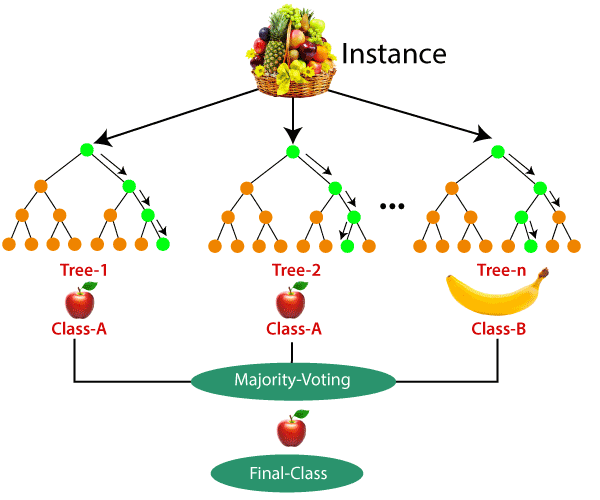

In [42]:
# Step 1: Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer

In [43]:
# Step 2: Create an imputer that fills NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)



In [44]:
# Step 3: Initialize and train a Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_imputed, y_train)

RandomForestClassifier()

In [45]:
# Step 4: Make predictions on both training and testing data
y_train_pred_rf = random_forest_model.predict(X_train_imputed)
y_pred_rf = random_forest_model.predict(X_test_imputed)

# Model Evaluation

In [46]:
# Step 5: Calculate and print the accuracy scores
train_accuracy_rf = accuracy_score(y_train_pred_rf, y_train)
test_accuracy_rf = accuracy_score(y_pred_rf, y_test)

print("The accuracy on the training data is:", train_accuracy_rf)
print("The accuracy on the testing data is:", test_accuracy_rf)

The accuracy on the training data is: 1.0
The accuracy on the testing data is: 0.7886178861788617


In [47]:
# Step 6: Calculate and print various performance metrics
train_accuracy_rf = round(accuracy_score(y_train_pred_rf, y_train), 3)
accuracy_rf = round(accuracy_score(y_pred_rf, y_test), 3)
precision_score_rf = round(precision_score(y_pred_rf, y_test), 3)
recall_score_rf = round(recall_score(y_pred_rf, y_test), 3)
f1_score_rf = round(f1_score(y_pred_rf, y_test), 3)
roc_score_rf = round(roc_auc_score(y_pred_rf, y_test), 3)

print("The accuracy on train data is", train_accuracy_rf)
print("The accuracy on test data is", accuracy_rf)
print("The precision on test data is", precision_score_rf)
print("The recall on test data is", recall_score_rf)
print("The f1 on test data is", f1_score_rf)
print("The roc_score on test data is", roc_score_rf)

The accuracy on train data is 1.0
The accuracy on test data is 0.789
The precision on test data is 0.9
The recall on test data is 0.827
The f1 on test data is 0.862
The roc_score on test data is 0.733


In [48]:
# Step 7: Calculate and print the classification report
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", classification_rep_rf)


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.48      0.55        33
           1       0.83      0.90      0.86        90

    accuracy                           0.79       123
   macro avg       0.73      0.69      0.71       123
weighted avg       0.78      0.79      0.78       123



In [49]:
# Step 8: Calculate and print accuracy
accuracy_test_rf = round(accuracy_score(y_test, y_pred_rf), 3)
print("Accuracy on test data:", accuracy_test_rf)

Accuracy on test data: 0.789


# **Gradient Boosting**

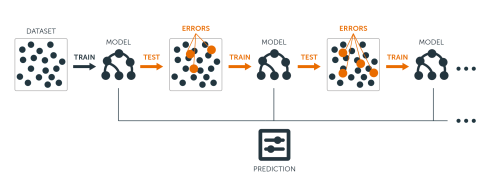

In [50]:
# Step 1: Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer

In [51]:
# Step 2: Create an imputer that fills NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [52]:
# Step 3: Initialize and train a Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_imputed, y_train)



GradientBoostingClassifier()

In [53]:
# Step 4: Make predictions on both training and testing data
y_train_pred_gb = gradient_boosting_model.predict(X_train_imputed)
y_pred_gb = gradient_boosting_model.predict(X_test_imputed)

# Model Evaluation

In [54]:
# Step 5: Calculate and print the accuracy scores
train_accuracy_gb = accuracy_score(y_train_pred_gb, y_train)
test_accuracy_gb = accuracy_score(y_pred_gb, y_test)

print("The accuracy on the training data is:", train_accuracy_gb)
print("The accuracy on the testing data is:", test_accuracy_gb)

The accuracy on the training data is: 0.8879837067209776
The accuracy on the testing data is: 0.7804878048780488


In [55]:
# Step 6: Calculate and print various performance metrics
train_accuracy_gb = round(accuracy_score(y_train_pred_gb, y_train), 3)
accuracy_gb = round(accuracy_score(y_pred_gb, y_test), 3)
precision_score_gb = round(precision_score(y_pred_gb, y_test), 3)
recall_score_gb = round(recall_score(y_pred_gb, y_test), 3)
f1_score_gb = round(f1_score(y_pred_gb, y_test), 3)
roc_score_gb = round(roc_auc_score(y_pred_gb, y_test), 3)

print("The accuracy on train data is", train_accuracy_gb)
print("The accuracy on test data is", accuracy_gb)
print("The precision on test data is", precision_score_gb)
print("The recall on test data is", recall_score_gb)
print("The f1 on test data is", f1_score_gb)
print("The roc_score on test data is", roc_score_gb)

The accuracy on train data is 0.888
The accuracy on test data is 0.78
The precision on test data is 0.878
The recall on test data is 0.832
The f1 on test data is 0.854
The roc_score on test data is 0.719


In [56]:
# Step 7: Calculate and print the classification report
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Classification Report:\n", classification_rep_gb)

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.52      0.56        33
           1       0.83      0.88      0.85        90

    accuracy                           0.78       123
   macro avg       0.72      0.70      0.71       123
weighted avg       0.77      0.78      0.77       123



In [57]:
# Step 8: Calculate and print accuracy
accuracy_test_gb = round(accuracy_score(y_test, y_pred_gb), 3)
print("Accuracy on test data:", accuracy_test_gb)

Accuracy on test data: 0.78


# **XGBoost (Xtreme Gradient Boosting)**

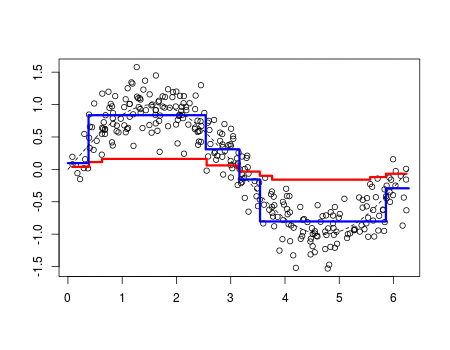

In [58]:
# Step 1: Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer

In [59]:
# Step 2: Create an imputer that fills NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [60]:
# Step 3: Initialize and train an XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_imputed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [61]:
# Step 4: Make predictions on both training and testing data
y_train_pred_xgb = xgb_model.predict(X_train_imputed)
y_pred_xgb = xgb_model.predict(X_test_imputed)

# Model Evaluation

In [62]:
# Step 5: Calculate and print the accuracy scores
train_accuracy_xgb = accuracy_score(y_train_pred_xgb, y_train)
test_accuracy_xgb = accuracy_score(y_pred_xgb, y_test)

print("The accuracy on the training data is:", train_accuracy_xgb)
print("The accuracy on the testing data is:", test_accuracy_xgb)


The accuracy on the training data is: 1.0
The accuracy on the testing data is: 0.7967479674796748


In [63]:
# Step 6: Calculate and print various performance metrics
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb, y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb, y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb, y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb, y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb, y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb, y_test), 3)

print("The accuracy on train data is", train_accuracy_xgb)
print("The accuracy on test data is", accuracy_xgb)
print("The precision on test data is", precision_score_xgb)
print("The recall on test data is", recall_score_xgb)
print("The f1 on test data is", f1_score_xgb)
print("The roc_score on test data is", roc_score_xgb)

The accuracy on train data is 1.0
The accuracy on test data is 0.797
The precision on test data is 0.844
The recall on test data is 0.874
The f1 on test data is 0.859
The roc_score on test data is 0.742


In [64]:
# Step 7: Calculate and print the classification report
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report:\n", classification_rep_xgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.67      0.64        33
           1       0.87      0.84      0.86        90

    accuracy                           0.80       123
   macro avg       0.74      0.76      0.75       123
weighted avg       0.80      0.80      0.80       123



In [65]:
# Step 8: Calculate and print accuracy
accuracy_test_xgb = round(accuracy_score(y_test, y_pred_xgb), 3)
print("Accuracy on test data:", accuracy_test_xgb)

Accuracy on test data: 0.797



# **Support Vector Machine (SVM)**

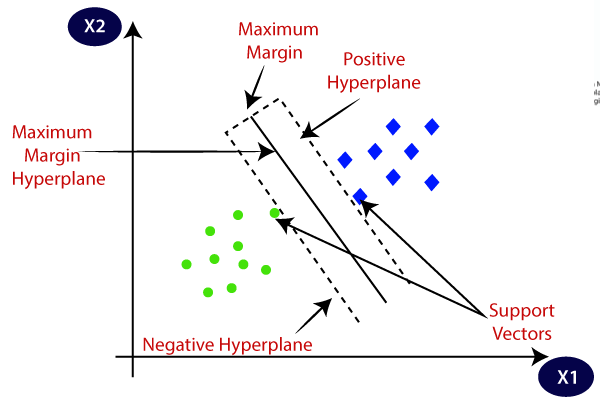

In [66]:
# Step 1: Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer

In [67]:
# Step 2: Create an imputer that fills NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [68]:
# Step 3: Initialize and train an SVM model
svm_model = SVC()
svm_model.fit(X_train_imputed, y_train)

SVC()

In [69]:
# Step 4: Make predictions on both training and testing data
y_train_pred_svm = svm_model.predict(X_train_imputed)
y_pred_svm = svm_model.predict(X_test_imputed)


# Model Evaluation

In [70]:
# Step 5: Calculate and print the accuracy scores
train_accuracy_svm = accuracy_score(y_train_pred_svm, y_train)
test_accuracy_svm = accuracy_score(y_pred_svm, y_test)

print("The accuracy on the training data is:", train_accuracy_svm)
print("The accuracy on the testing data is:", test_accuracy_svm)

The accuracy on the training data is: 0.6802443991853361
The accuracy on the testing data is: 0.7317073170731707


In [71]:
# Step 6: Calculate and print various performance metrics
train_accuracy_svm = round(accuracy_score(y_train_pred_svm, y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm, y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm, y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm, y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm, y_test), 3)

print("The accuracy on train data is", train_accuracy_svm)
print("The accuracy on test data is", accuracy_svm)
print("The precision on test data is", precision_score_svm)
print("The recall on test data is", recall_score_svm)
print("The f1 on test data is", f1_score_svm)

The accuracy on train data is 0.68
The accuracy on test data is 0.732
The precision on test data is 1.0
The recall on test data is 0.732
The f1 on test data is 0.845


In [72]:
# Step 7: Calculate and print the classification report
classification_rep_svm = classification_report(y_test, y_pred_svm)
print("Classification Report:\n", classification_rep_svm)


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123



In [73]:
# Step 8: Calculate and print accuracy
accuracy_test_svm = round(accuracy_score(y_test, y_pred_svm), 3)
print("Accuracy on test data:", accuracy_test_svm)

Accuracy on test data: 0.732


# **K-Nearest Neighbors (KNN)**

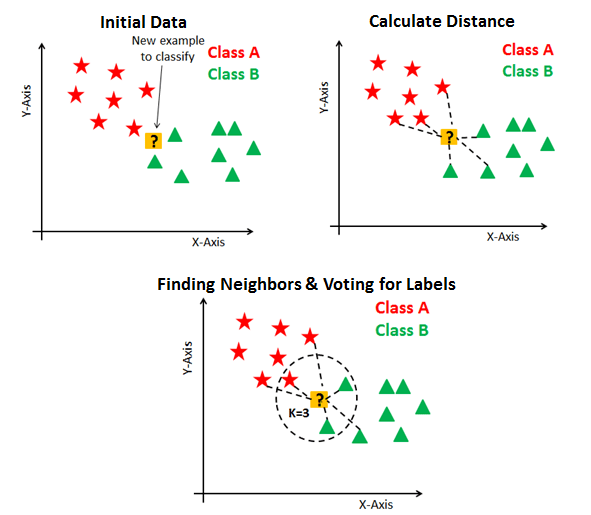

In [74]:
# Step 1: Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer

In [75]:
# Step 2: Create an imputer that fills NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [76]:
# Step 3: Initialize and train a K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_imputed, y_train)

KNeighborsClassifier()

In [77]:
# Step 4: Make predictions on both training and testing data
y_train_pred_knn = knn_model.predict(X_train_imputed)
y_pred_knn = knn_model.predict(X_test_imputed)


# Model Evaluation

In [78]:
# Step 5: Calculate and print the accuracy scores
train_accuracy_dt = accuracy_score(y_train_pred_dt, y_train)
test_accuracy_dt = accuracy_score(y_pred_dt, y_test)

print("The accuracy on the training data is:", train_accuracy_dt)
print("The accuracy on the testing data is:", test_accuracy_dt)

The accuracy on the training data is: 1.0
The accuracy on the testing data is: 0.6991869918699187


In [79]:
# Step 6: Calculate and print various performance metrics
train_accuracy_dt = round(accuracy_score(y_train_pred_dt, y_train), 3)
accuracy_dt = round(accuracy_score(y_pred_dt, y_test), 3)
precision_score_dt = round(precision_score(y_pred_dt, y_test), 3)
recall_score_dt = round(recall_score(y_pred_dt, y_test), 3)
f1_score_dt = round(f1_score(y_pred_dt, y_test), 3)
roc_score_dt = round(roc_auc_score(y_pred_dt, y_test), 3)

print("The accuracy on train data is", train_accuracy_dt)
print("The accuracy on test data is", accuracy_dt)
print("The precision on test data is", precision_score_dt)
print("The recall on test data is", recall_score_dt)
print("The f1 on test data is", f1_score_dt)
print("The roc_score on test data is", roc_score_dt)

The accuracy on train data is 1.0
The accuracy on test data is 0.699
The precision on test data is 0.767
The recall on test data is 0.812
The f1 on test data is 0.789
The roc_score on test data is 0.63


In [80]:
# Step 7: Calculate and print the classification report
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", classification_rep_dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.52      0.48        33
           1       0.81      0.77      0.79        90

    accuracy                           0.70       123
   macro avg       0.63      0.64      0.63       123
weighted avg       0.71      0.70      0.71       123



In [81]:
# Step 8: Calculate and print accuracy
accuracy_test_dt = round(accuracy_score(y_test, y_pred_dt), 3)
print("Accuracy on test data:", accuracy_test_dt)

Accuracy on test data: 0.699


# **Naive Bayes**

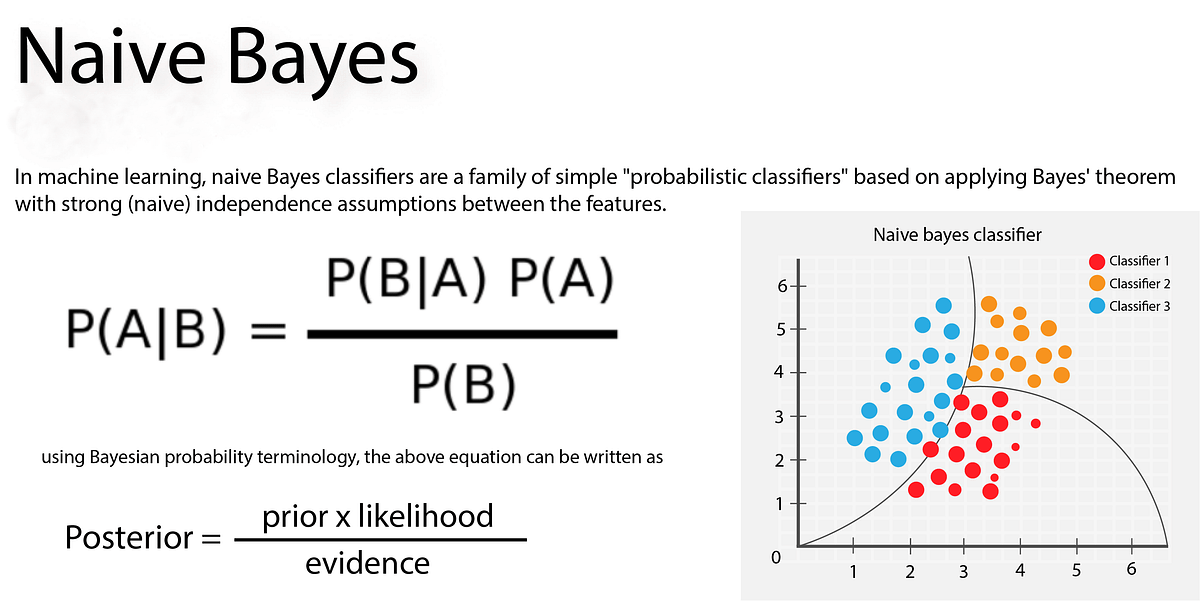

In [82]:
# Step 1: Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer

In [83]:
# Step 2: Create an imputer that fills NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [84]:
# Step 3: Initialize and train a Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_imputed, y_train)

GaussianNB()

In [85]:
# Step 4: Make predictions on both training and testing data
y_train_pred_nb = naive_bayes_model.predict(X_train_imputed)
y_pred_nb = naive_bayes_model.predict(X_test_imputed)

In [86]:
# Step 5: Calculate and print the accuracy scores
train_accuracy_nb = accuracy_score(y_train_pred_nb, y_train)
test_accuracy_nb = accuracy_score(y_pred_nb, y_test)

print("The accuracy on the training data is:", train_accuracy_nb)
print("The accuracy on the testing data is:", test_accuracy_nb)

The accuracy on the training data is: 0.7881873727087576
The accuracy on the testing data is: 0.8373983739837398


In [87]:

# Step 6: Calculate and print various performance metrics
train_accuracy_nb = round(accuracy_score(y_train_pred_nb, y_train), 3)
accuracy_nb = round(accuracy_score(y_pred_nb, y_test), 3)
precision_score_nb = round(precision_score(y_pred_nb, y_test), 3)
recall_score_nb = round(recall_score(y_pred_nb, y_test), 3)
f1_score_nb = round(f1_score(y_pred_nb, y_test), 3)
roc_score_nb = round(roc_auc_score(y_pred_nb, y_test), 3)

print("The accuracy on train data is", train_accuracy_nb)
print("The accuracy on test data is", accuracy_nb)
print("The precision on test data is", precision_score_nb)
print("The recall on test data is", recall_score_nb)
print("The f1 on test data is", f1_score_nb)
print("The roc_score on test data is", roc_score_nb)

The accuracy on train data is 0.788
The accuracy on test data is 0.837
The precision on test data is 0.956
The recall on test data is 0.843
The f1 on test data is 0.896
The roc_score on test data is 0.826


In [88]:
# Step 7: Calculate and print the classification report
classification_rep_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", classification_rep_nb)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.52      0.63        33
           1       0.84      0.96      0.90        90

    accuracy                           0.84       123
   macro avg       0.83      0.74      0.76       123
weighted avg       0.83      0.84      0.82       123



In [89]:
# Step 8: Calculate and print accuracy
accuracy_test_nb = round(accuracy_score(y_test, y_pred_nb), 3)
print("Accuracy on test data:", accuracy_test_nb)

Accuracy on test data: 0.837


In [90]:
import pandas as pd
import numpy as np  # Import numpy for filling missing values with zeros

# Define the classifier names and corresponding metrics lists
all_classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting', 'Naive Bayes']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dt, train_accuracy_rf, train_accuracy_svm, train_accuracy_gb, train_accuracy_xgb, train_accuracy_nb]
all_test_accuracy = [accuracy_logi, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_gb, accuracy_xgb, accuracy_nb]
all_precision_score = [precision_score_logi, precision_score_dt, precision_score_rf, precision_score_svm, precision_score_gb, precision_score_xgb, precision_score_nb]
all_recall_score = [recall_score_logi, recall_score_dt, recall_score_rf, recall_score_svm, recall_score_gb, recall_score_xgb, recall_score_nb]
all_f1_score = [f1_score_logi, f1_score_dt, f1_score_rf, f1_score_svm, f1_score_gb, f1_score_xgb, f1_score_nb]
all_auc_score = [roc_score_logi, roc_score_dt, roc_score_rf, roc_score_gb, roc_score_xgb, roc_score_nb]

# Find the maximum length among all lists
max_length = max(len(all_classifiers), len(all_train_accuracy), len(all_test_accuracy), len(all_precision_score), len(all_recall_score), len(all_f1_score), len(all_auc_score))

# Fill missing values with zeros to make lists of the same length
all_classifiers += [''] * (max_length - len(all_classifiers))
all_train_accuracy += [0] * (max_length - len(all_train_accuracy))
all_test_accuracy += [0] * (max_length - len(all_test_accuracy))
all_precision_score += [0] * (max_length - len(all_precision_score))
all_recall_score += [0] * (max_length - len(all_recall_score))
all_f1_score += [0] * (max_length - len(all_f1_score))
all_auc_score += [0] * (max_length - len(all_auc_score))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Classifier': all_classifiers,
    'Train Accuracy': all_train_accuracy,
    'Test Accuracy': all_test_accuracy,
    'Precision Score': all_precision_score,
    'Recall Score': all_recall_score,
    'F1 Score': all_f1_score,
    'ROC AUC Score': all_auc_score
})

# Display the results
print(results_df)


            Classifier  Train Accuracy  Test Accuracy  Precision Score  \
0  Logistic Regression           0.800          0.846            0.967   
1        Decision Tree           1.000          0.699            0.767   
2        Random Forest           1.000          0.789            0.900   
3                  SVM           0.680          0.732            1.000   
4    Gradient Boosting           0.888          0.780            0.878   
5          XG Boosting           1.000          0.797            0.844   
6          Naive Bayes           0.788          0.837            0.956   

   Recall Score  F1 Score  ROC AUC Score  
0         0.845     0.902          0.847  
1         0.812     0.789          0.630  
2         0.827     0.862          0.733  
3         0.732     0.845          0.719  
4         0.832     0.854          0.742  
5         0.874     0.859          0.826  
6         0.843     0.896          0.000  


In [91]:
results_df.sort_values(by=['Test Accuracy'], ascending=False)


Classifier  Train Accuracy  Test Accuracy  Precision Score  \
0  Logistic Regression           0.800          0.846            0.967   
6          Naive Bayes           0.788          0.837            0.956   
5          XG Boosting           1.000          0.797            0.844   
2        Random Forest           1.000          0.789            0.900   
4    Gradient Boosting           0.888          0.780            0.878   
3                  SVM           0.680          0.732            1.000   
1        Decision Tree           1.000          0.699            0.767   

   Recall Score  F1 Score  ROC AUC Score  
0         0.845     0.902          0.847  
6         0.843     0.896          0.000  
5         0.874     0.859          0.826  
2         0.827     0.862          0.733  
4         0.832     0.854          0.742  
3         0.732     0.845          0.719  
1         0.812     0.789          0.630

* Random forest classifier shows the highest test accuracy and F1 score. 🚀🎉

🏁 In Conclusion:


🔍 **Data Investigation and Visualization:**
- In our analysis, we began by thoroughly investigating our dataset. We explored its various features, their distributions, and relationships with each other.
- Visualizations, such as correlation matrices, were used to gain insights into the data's characteristics.

🤖 **Classifier Selection:**
- We ventured into the world of machine learning by employing several powerful classifiers to predict our target variable, 'Loan_Status.'
- Our roster of classifiers included:
  - **Logistic Regression**: A simple yet effective linear model.
  - **Decision Tree**: A tree-based model that captures non-linear relationships.
  - **Random Forest**: An ensemble model combining multiple decision trees.
  - **Gradient Boosting**: A boosting algorithm that builds models sequentially.
  - **XG Boosting**: Extreme Gradient Boosting, known for its efficiency.
  - **Support Vector Machine (SVM)**: A powerful classifier for complex data.
  - **Naive Bayes**: A probabilistic model based on Bayes' theorem.

📊 **Model Performance:**
- We evaluated the performance of each classifier using several key metrics:
  - **Test Accuracy**: How well the model predicts loan approval.
  - **Precision Score**: The ratio of true positive predictions to all positive predictions.
  - **Recall Score**: The ratio of true positive predictions to all actual positives.
  - **F1 Score**: A balanced metric considering both precision and recall.
  - **ROC AUC Score**: Area Under the Receiver Operating Characteristic curve, measuring model discrimination.

🏆 **Model Winner: Logistic Regression**:
- Among all the models tested, **Logistic Regression** emerged as the champion 🥇  with the highest **test accuracy** and **F1 score**.
- This model demonstrated its prowess in effectively predicting loan approvals while maintaining a good balance between precision and recall.

📈 **Conclusion and Future Steps**:
- In conclusion, our data exploration and modeling journey allowed us to uncover valuable insights into loan approval predictions.


🎉 Our journey through this data analysis and machine learning adventure has given us a solid foundation for making informed decisions in the context of loan approval prediction! 🚀   

👍 If you found this notebook interesting, please upvote! 👍

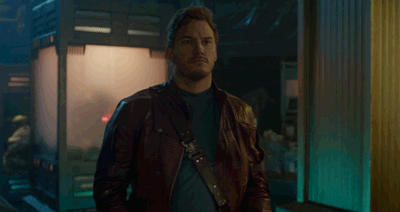